In [2]:
import sys
import os

# Assuming the notebook is in the same directory as the `py` folder or its subfolders
# Adjust the path as necessary
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'py'))
sys.path.append(parent_dir)

# Now you can import your module
from expectation import get_expectation_afm_heisenberg, AFMHeisenbergArgs, get_expectation_afm_heisenberg_lattice, AFMHeisenbergLatticeArgs

from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
import shutil
import csv
from functools import partial

p = 4
length = 8
filepath_o = ".results/Gradient_descent_lattice_p=4"
filepath = "convergence"
figure = True
b = (0,1)
bounds = [b] * (2 * p)  # Create a list of bounds of length 2 * p

qsim_option = {'t': int(length / 2), 'f': 1}

initial_gamma = np.array([0.6 for i in range(p)])
initial_beta = np.array([0.6 for i in range(p)])
init_param = np.concatenate([initial_gamma, initial_beta])

def clear_and_recreate_directory(dir_path):
    try:
        if os.path.exists(dir_path):
            shutil.rmtree(dir_path)
            print(f"Directory {dir_path} cleared.")
        os.makedirs(dir_path)
        print(f"Directory {dir_path} created.")
    except Exception as e:
        print(f"Error occurred while trying to clear and recreate the directory: {e}")

function_args = AFMHeisenbergLatticeArgs(int(length/2),2, qsim_option)
function = partial(get_expectation_afm_heisenberg_lattice, function_args=function_args)

def energy_dummy(params):
    gamma, beta = np.split(params, 2)
    energy = function(gamma=gamma, beta=beta)
    return energy

history_params = []
history_energy = []

def callback(params):
    history_params.append(params)
    history_energy.append(energy_dummy(params))
    gamma, beta = np.split(params, 2)
    record = [len(history_energy), energy_dummy(params)] + list(gamma) + list(beta)
    # Open the file in append mode and write the record
    with open(filepath, mode='a', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(record)
        if figure:
            print(record)
        f.flush()

clear_and_recreate_directory(filepath_o)

with open(filepath, mode='w', newline='') as f:
        writer = csv.writer(f)
        headline = ["iter", "energy"]
        for p in range(int(len(initial_gamma))):
            headline.append("gamma[{}]".format(p))
            headline.append("beta[{}]".format(p))
        writer.writerow(headline)

result = minimize(
                fun     = energy_dummy,
                x0      = init_param,
                jac     = "3-point",
                method  = 'L-BFGS-B',
                options = {'gtol': 1e-8},
                bounds  = [(0,None)]*len(init_param),
                tol     = 1e-10,
                callback=callback
                )

print(result)
print(history_params)
print(history_energy)

Directory .results/Gradient_descent_lattice_p=4 cleared.
Directory .results/Gradient_descent_lattice_p=4 created.
[1, -14.458387792110443, 0.5998891032117061, 0.5966200765747478, 0.5966200765747478, 0.5966200765747478, 0.7605231010554179, 0.5966200765747478, 0.5966200765747478, 0.795289244185555]
[2, -15.199318647384644, 0.5995174550059386, 0.5734504035396789, 0.6004924613786581, 0.6184602522918349, 0.7092287028537488, 0.614217095362005, 0.5560781594906302, 0.7598948604934613]
[3, -15.788080215454102, 0.5995479549865926, 0.5779796594672102, 0.6084258882955355, 0.613281375422672, 0.7340300322926531, 0.6084515390027253, 0.5684385756101923, 0.7810389572694424]
[4, -15.901433229446411, 0.5994054337804094, 0.5738536725038501, 0.6186135078771889, 0.6160810052511885, 0.7409372172149804, 0.6081025894849214, 0.5653794269578758, 0.7880463519949379]
[5, -15.988386988639832, 0.6001981600545382, 0.5675037663047061, 0.6305310578089174, 0.6200524076754291, 0.740657682894874, 0.6087644358515509, 0.556

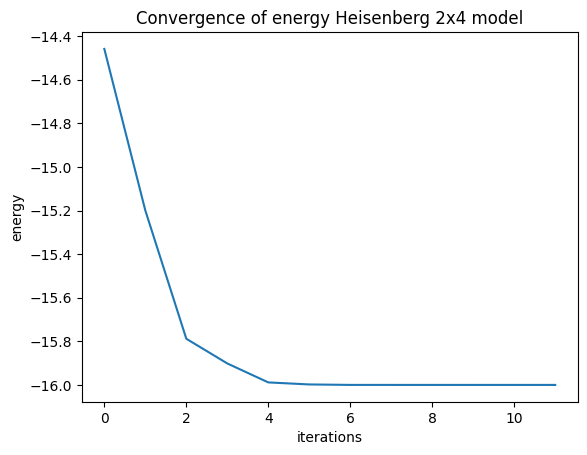

In [3]:
plt.plot(history_energy)
plt.title('Convergence of energy Heisenberg 2x4 model')
plt.xlabel("iterations")
plt.ylabel("energy")
plt.show()

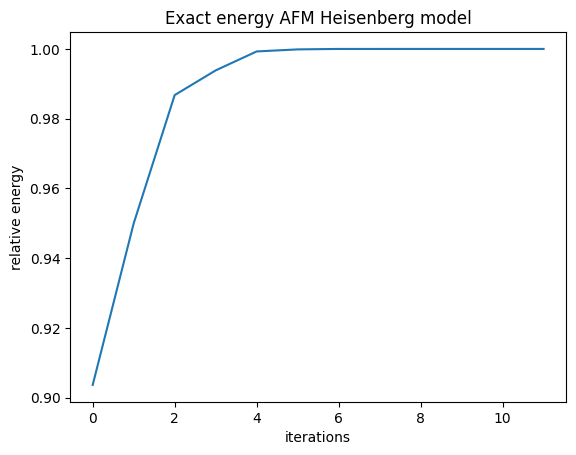

In [7]:
from exact_expectation import get_exact_expectation_afm_heisenberg_lattice
exact_energy, state = get_exact_expectation_afm_heisenberg_lattice(int(length/2), 2)

plt.plot(history_energy/exact_energy)
plt.title('Exact energy AFM Heisenberg model')
plt.xlabel("iterations")
plt.ylabel("relative energy")
plt.show()
